In [7]:
token='38a93fa5-0ebc-4127-ab37-4bbf9d6597f2'
json_str='{"studyIds":["acc_tcga"],"pageSize":999999,"pageIndex":1,"attributesRangeFilters":[],"attributesEqualFilters":[],"attributesDateFilters":[],"mutationFilter":{"hugoGeneSymbols":[],"exacStart":0,"exadEnd":1,"vabundStart":0,"vabundEnd":1,"variantSource":[],"variantType":[],"variantClass":[],"sequencer":[],"sequencerSource":[],"searchStr":""}}'
host='https://peta.bgi.com/api'

In [ ]:
# 启动python环境，并载入包
tryCatch({
    library(reticulate)
    use_condaenv("r-reticulate")#peta生产环境可用，本地机未安
    suppressMessages(suppressWarnings(library(maftools) ))
 },error=function(e){
     print(e)
 } )

In [9]:
# 调用pypeta获取数据
tryCatch({
    pypyta<- import("pypeta")
    peta<-pypyta$Peta(token=token,host=host)
    peta$set_data_restriction_from_json_string(json_str)
    mut<-peta$fetch_mutation_data()
    mut<-mut[which(mut$NCBI_Build != 'NA'),]
    cli<-peta$fetch_clinical_data()
    names(cli)[names(cli) =='sampleId'] <- 'Tumor_Sample_Barcode'
 },error=function(e){
     print(e)
 } )

In [10]:
#Reading MAF files
tryCatch({   
    laml = read.maf(maf = mut,clinicalData=cli,verbose = F)
 },error=function(e){
     print(e)
 } )

# 数据选择条件

In [13]:
#print selected data set
tryCatch({
    json<-import("json")
    json$loads(json_str)
    pypyta$filter_description(json_str)
 },error=function(e){
     print(e)
 } )

[1] "选取的研究数据集包括acc_tcga。\n"

# 组学特征分析

## 临床特征分布

In [15]:
tryCatch({
     #shows clinical data associated with samples.
    getClinicalData(laml)
 },error=function(e){
     print(e)
 } )

CANCER_TYPE,CANCER_TYPE_DETAILED,DAYS_TO_COLLECTION,FRACTION_GENOME_ALTERED,INITIAL_WEIGHT,IS_FFPE,MUTATION_COUNT,OCT_EMBEDDED,ONCOTREE_CODE,OTHER_SAMPLE_ID,⋯,PHARM_TX_MITOTANE_FOR_MACRO_DISEASE,TREATMENT_OUTCOME_FIRST_COURSE,DAYS_LAST_FOLLOWUP,PHARM_TX_MITOTANE_ADJUVANT,PHARM_TX_MITOTANE_THERAPUTIC_AT_REC,PHARM_TX_MITOTANE_THERAPUTIC_LEVELS,METASTATIC_DX_CONFIRMED_BY_OTHER,PHARM_TX_MITOTANE_THERAPUTIC_MACRO,PHARM_TX_MITOTANE_THERAPUTIC_AT_PROG,RET
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,4691,0.058513251,40,NO,39,TRUE,ACC,E4038EBB-6E6D-44B1-84AD-E35AAFCA7B70,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,3124,0.403263149,350,NO,81,TRUE,ACC,46B7EB7C-E5F7-476D-A68C-5972F947445F,⋯,YES,Progressive_Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,1584,0.413073714,310,NO,69,TRUE,ACC,1FB59B6F-53C0-4B14-82CC-77CD55C67AD6,⋯,NaN,Complete_Remission/Response,1942,YES,YES,YES,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,4642,0.925893374,80,NO,170,TRUE,ACC,51EE1274-9144-4464-AA1E-AD15D9086984,⋯,YES,Progressive_Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,4537,0.801515247,40,NO,519,TRUE,ACC,C6214F9B-35C8-424C-B6FE-BEC1A9317C0A,⋯,YES,Progressive_Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,2220,0.478488996,340,NO,92,TRUE,ACC,C0C9DD1B-98B1-4A20-8927-3C0B75A4559E,⋯,NaN,Complete_Remission/Response,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,1388,0.893281551,120,NO,91,TRUE,ACC,945CC9B8-A732-484E-B423-9EFBC556E3FD,⋯,NaN,Progressive_Disease,NaN,YES,NaN,NO,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,396,0.252826685,160,NO,158,TRUE,ACC,2F47F06E-8F76-440E-BBCE-B7C90635A59E,⋯,NaN,Complete_Remission/Response,NaN,YES,NO,NO,NaN,NaN,NaN,NaN
Adrenocortical_Carcinoma,Adrenocortical_Carcinoma,849,0.946568581,190,NO,116,TRUE,ACC,14D95372-5444-4525-B2D6-19FC51F3E336,⋯,NaN,Complete_Remission/Response,1183,YES,NaN,NaN,NaN,NaN,NaN,NaN


## 样本级别变异分布 

In [16]:
tryCatch({
     #Shows sample summry.
    getSampleSummary(laml)
 },error=function(e){
     print(e)
 } )

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,Splice_Site,Translation_Start_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
TCGA-OR-A5KB-01,61,12,11,9,1656,141,2,56,3,1951
TCGA-PK-A5HB-01,119,51,17,4,905,48,2,20,1,1167
TCGA-OR-A5JA-01,5,1,7,2,482,94,1,15,2,609
TCGA-OR-A5LJ-01,73,12,28,4,393,20,0,3,0,533
TCGA-OR-A5J5-01,59,14,10,2,408,16,0,1,0,510
TCGA-OR-A5JB-01,14,3,5,1,277,28,0,7,1,336
TCGA-OR-A5LB-01,65,21,23,1,199,11,0,5,0,325
TCGA-OR-A5K4-01,2,2,1,0,257,14,0,3,0,279
TCGA-P6-A5OH-01,12,3,12,1,180,6,0,2,0,216


## 基因水平变异分布

In [17]:
tryCatch({
     #Shows gene summary.
    getGeneSummary(laml)
 },error=function(e){
     print(e)
 } )

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Nonstop_Mutation,Splice_Site,Translation_Start_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
ZFPM1,45,0,62,0,5,0,0,0,0,112,47,47
MUC5B,0,0,0,0,50,0,0,0,0,50,35,35
GARS,0,0,0,0,35,0,0,0,0,35,34,34
ZNF517,0,0,0,0,34,0,0,0,0,34,33,33
LRIG1,0,0,0,0,54,0,0,0,0,54,31,31
MUC2,0,0,1,0,32,0,0,0,0,33,28,28
OBSCN,0,0,0,0,31,1,0,0,0,32,27,27
LACTB,1,0,0,0,26,0,0,0,0,27,27,27
CCDC102A,0,0,0,0,26,0,0,0,0,26,26,26


In [18]:
#按照单个基因处理
genename <- unique(mut$Hugo_Symbol)
genename <- genename[1]
#colnames(mut)

## 变异分布特性图

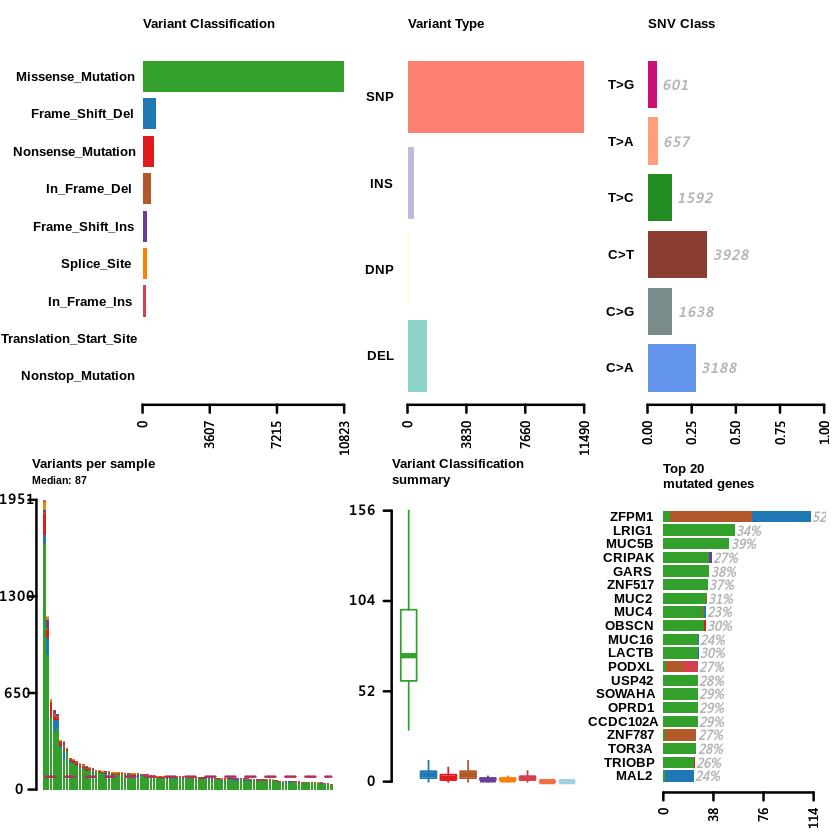

In [19]:
tryCatch({
      suppressMessages(suppressWarnings(plotmafSummary(maf = laml, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE, showBarcodes = FALSE,top=20)))
 },error=function(e){
     print(e)
 } )

## Ti/TV

NULL

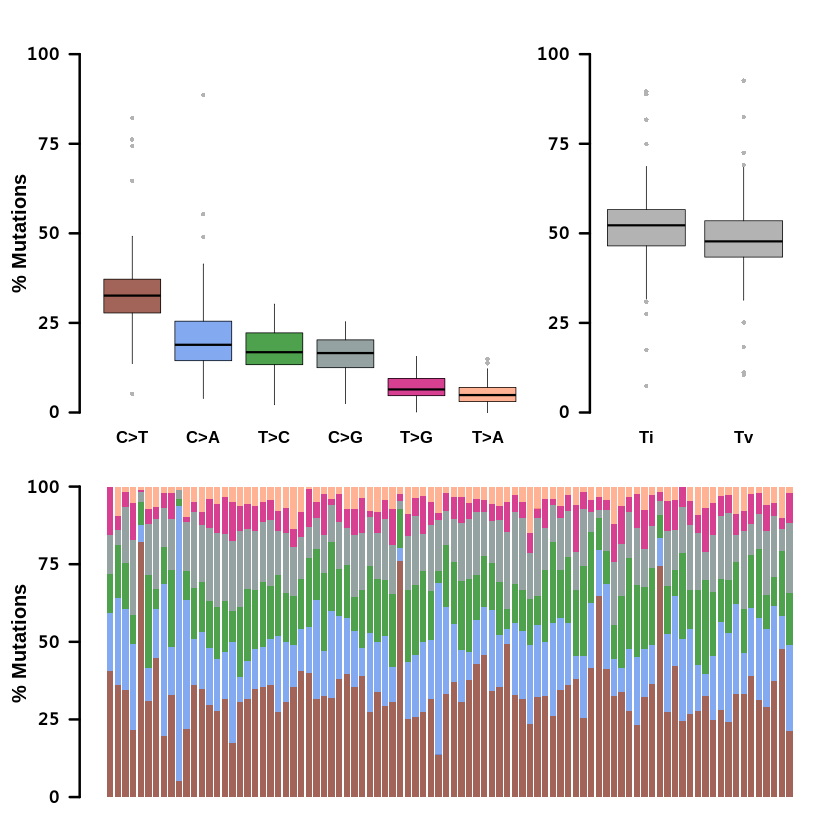

In [20]:
tryCatch({
     laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)
     suppressMessages(suppressWarnings(plotTiTv(res = laml.titv)))
 },error=function(e){
     print(e)
 } )

## 基因变异分布棒棒糖图

   HGNC    refseq.ID   protein.ID aa.length
1: KRT8 NM_001256282 NP_001243211       511
2: KRT8    NM_002273    NP_002264       483
3: KRT8 NM_001256293 NP_001243222       483


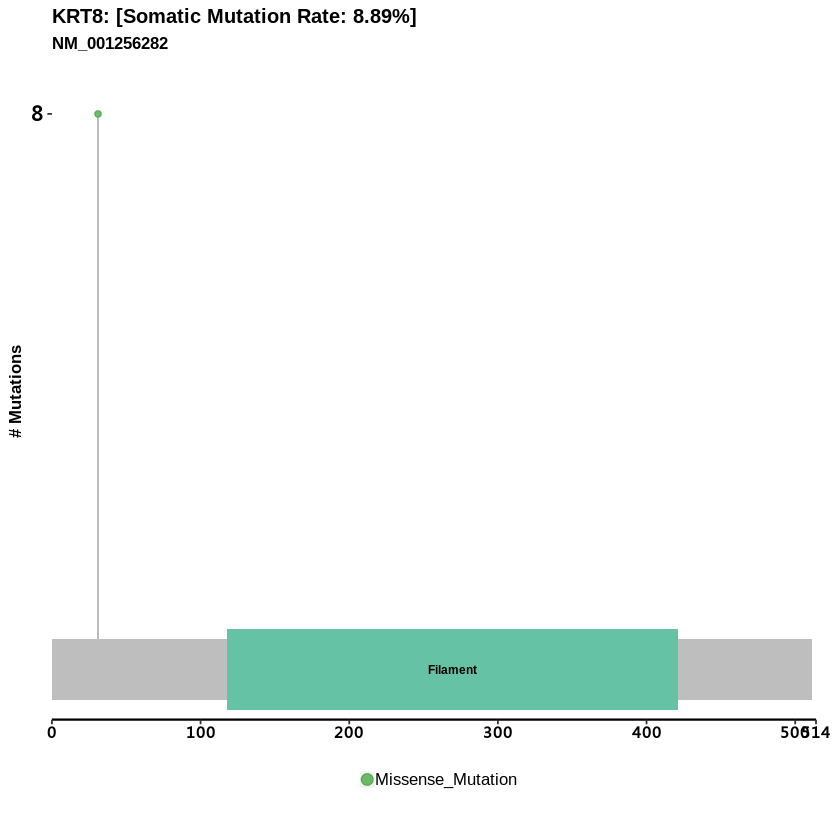

In [21]:
tryCatch({
     laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)
     suppressMessages(suppressWarnings(lollipopPlot(maf = laml, gene = genename,AACol = 'HGVSp_Short', showMutationRate = TRUE,
                    cBioPortal= FALSE)))
 },error=function(e){
     print(e)
 } )

## 生存曲线分析

### 总生存期（Overall survival，OS）

KRT8 
   8 
    Group medianTime  N
1: Mutant    1087.95  8
2:     WT    1165.35 82


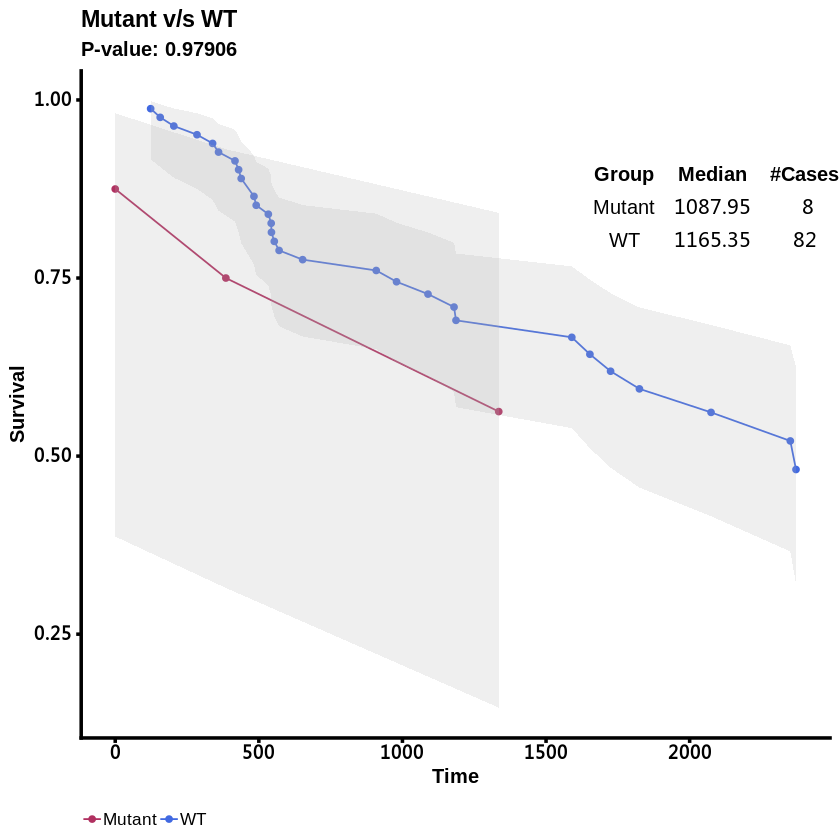

In [70]:
#Survival analysis based on grouping of gene mutation status
if(("OS_STATUS" %in% colnames(cli)) & ("OS_MONTHS" %in% colnames(cli))){
    cli_os <- cli[,c("Tumor_Sample_Barcode","OS_MONTHS","OS_STATUS")]
    #head(cli_os)
    cli_os<-cli_os[which(cli_os$OS_MONTHS != 'NA'),]
    cli_os<-cli_os[which(cli_os$OS_STATUS != 'NA'),]
    setos <- cli_os$Tumor_Sample_Barcode
    mut_os<-mut[which(mut$Tumor_Sample_Barcode %in% setos),]
    #nrow(mut)
    cli_os$OS_MONTHS<-as.numeric(cli_os$OS_MONTHS) * 30
    
    dd<-cli_os$OS_STATUS
    dd[dd == "DECEASED"] <- 1
    dd[dd == "LIVING"] <- 0
    cli_os$OS_STATUS <- as.numeric(dd)
    
    suppressMessages(suppressWarnings(laml <- read.maf(maf = mut_os,clinicalData=cli_os,verbose = F) ))
    
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'OS_MONTHS', Status = 'OS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("没有OS_STATUS和OS_MONTHS列，请检查数据。")
}

### 无病生存期（Disease-free  survival，DFS）

KRT8 
   8 
    Group medianTime  N
1: Mutant     840.60  8
2:     WT     723.45 82


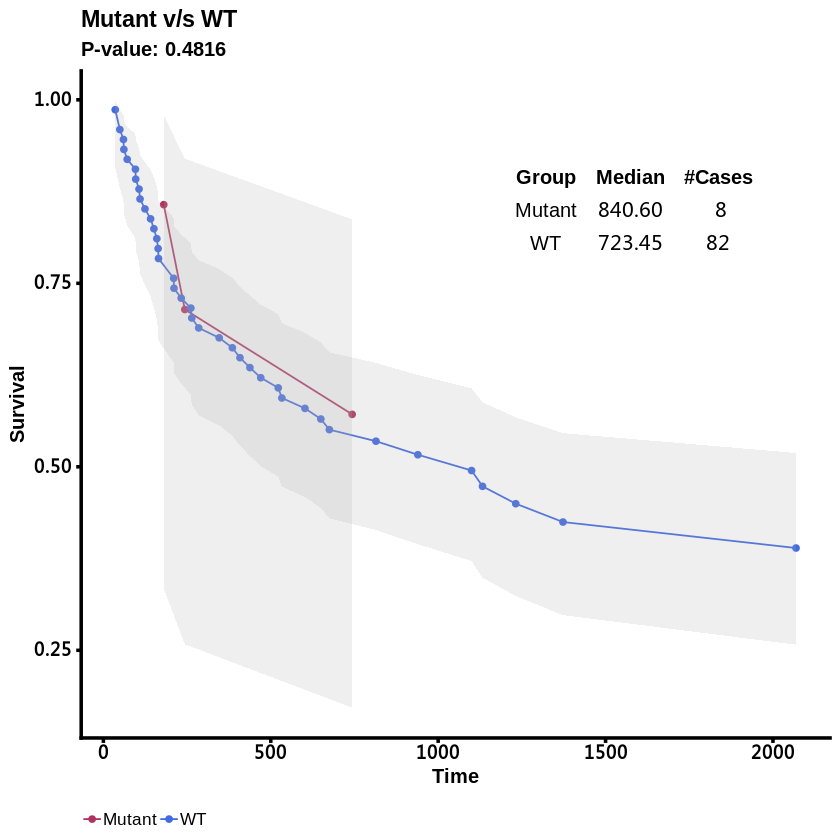

In [72]:
#Survival analysis based on grouping of gene mutation status
if(("DFS_STATUS" %in% colnames(cli)) & ("DFS_MONTHS" %in% colnames(cli))){
    cli_dfs <- cli[,c("Tumor_Sample_Barcode","DFS_MONTHS","DFS_STATUS")]
    #head(cli_dfs)
    cli_dfs <- cli_dfs[which(cli_dfs$DFS_MONTHS != 'NA'),]
    cli_dfs <- cli_dfs[which(cli_dfs$DFS_STATUS != 'NA'),]
    setdfs  <- cli_dfs$Tumor_Sample_Barcode
    mut_dfs<-mut[which(mut$Tumor_Sample_Barcode %in% setdfs),]
    #nrow(mut)
    cli_dfs$DFS_MONTHS<-as.numeric(cli_dfs$DFS_MONTHS) * 30
    
    dd<-cli_dfs$DFS_STATUS
    dd[dd == "Recurred/Progressed"] <- 1
    dd[dd == "Recurred"] <- 1
    dd[dd == "DiseaseFree"] <- 0
    cli_dfs$DFS_STATUS <- dd
    
    suppressMessages(suppressWarnings(laml <- read.maf(maf = mut_dfs,clinicalData=cli_dfs, verbose = F) ))
        
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'DFS_MONTHS', Status = 'DFS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("没有DFS_STATUS和DFS_MONTHS列，请检查数据。")
}

### 无进展生存期（progression-free survival，PFS）

In [14]:
#Survival analysis based on grouping of gene mutation status
if(("PFS_STATUS" %in% colnames(cli)) & ("PFS_MONTHS" %in% colnames(cli))){
    cli_pfs <- cli[,c("Tumor_Sample_Barcode","PFS_MONTHS","PFS_STATUS")]
    #head(cli_pfs)
    cli_pfs <- cli_pfs[which(cli_pfs$PFS_MONTHS != 'NA'),]
    cli_pfs <- cli_pfs[which(cli_pfs$PFS_STATUS != 'NA'),]
    setPFS  <- cli_pfs$Tumor_Sample_Barcode
    mut_pfs<-mut[which(mut$Tumor_Sample_Barcode %in% setPFS),]
    #nrow(mut)
    cli_pfs$PFS_MONTHS<-as.numeric(cli_pfs$PFS_MONTHS) * 30
    
    dd<-cli_pfs$PFS_STATUS
    dd[dd == "Progressed"] <- 1
    dd[dd == "Not Progressed"] <- 0
    cli_pfs$PFS_STATUS <- dd
    
    suppressMessages(suppressWarnings(laml <- read.maf(maf = mut_pfs,clinicalData=cli_pfs, verbose = F) ))
    
    tryCatch({
        suppressMessages(suppressWarnings(mafSurvival(maf = laml, genes = genename, time = 'PFS_MONTHS', Status = 'PFS_STATUS', isTCGA = FALSE)))
     },error=function(e){
         print(e)
     } )
 }else{
    print("没有PFS_STATUS和PFS_MONTHS列，请检查数据。")
}

[1] "没有PFS_STATUS和PFS_MONTHS列，请检查数据。"
